Goal: when $q_0 = q_1$, demostrate the limitation of UFL.

In [1]:
# load necessary modules

import numpy as np
import pandas as pd
from functools import partial
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import matplotlib as mpl
%matplotlib inline

In [2]:
resolution = 200

In [3]:
# 2 clients
def draw_stat(mu0, sigma0, mu1, sigma1, q = 0.5, resolution = 100):
    lbd_list = np.arange(-max(q,1-q)+0.0005, max(q,1-q),0.0005)
    def g(lbd, sigma = 2, mu = (-1, 0)):
        def p_inverse(y):
            return - np.log(max(1/y-1, 1e-10))
        return norm.cdf(p_inverse(1/2+lbd/2/q), loc = mu[1], scale = sigma) - norm.cdf(p_inverse(1/2-lbd/2/(1-q)), loc = mu[0], scale = sigma)

    g0 = partial(g, sigma = sigma0, mu = mu0)
    g1 = partial(g, sigma = sigma1, mu = mu1)
    g0_v = np.vectorize(g0)
    g1_v = np.vectorize(g1)

    df = pd.DataFrame({'lambda': lbd_list, 'g0(lambda)': g0_v(lbd_list), 'g1(lambda)': g1_v(lbd_list)})

    def global_fv(c0, c1):
        def g0_inverse(c):
            if c < abs(g0(0)): 
                if g0(0)>0:
                    return df[df['g0(lambda)'] < c]['lambda'].iloc[-1]
                else:
                    return df[df['g0(lambda)'] > -c]['lambda'].iloc[0]
            else:
                return 0
        def g1_inverse(c):
            if c < abs(g1(0)): 
                if g1(0) > 0:
                    return df[df['g1(lambda)'] < c]['lambda'].iloc[-1]
                else:
                    return df[df['g1(lambda)'] > -c]['lambda'].iloc[0]
            else:
                return 0
        lbd0 = g0_inverse(c0)
        lbd1 = g1_inverse(c1)
        l0 = (2*int(g0(0)>0)-1) * min(abs(g0(0)),c0)
        l1 = (2*int(g1(0)>0)-1) * min(abs(g1(0)),c1)
        return (l0 + l1 + g0(lbd1) + g1(lbd0))/4 
    
    c0, c1 = np.meshgrid(np.arange(0,1,1/resolution), np.arange(0,1,1/resolution))
    epsilon = np.zeros(c0.shape)
    for i in range(epsilon.shape[0]):
        for j in range(epsilon.shape[1]):
            epsilon[i,j] = global_fv(c0[i,j],c1[i,j])
    return [c0, c1, epsilon]

In [4]:
# 3 clients: not able to plot
def draw_stat_3_clients(mu0, sigma0, mu1, sigma1, mu2, sigma2, q = 0.5, resolution = 100):
    lbd_list = np.arange(-max(q,1-q)+0.0005, max(q,1-q),0.0005)
    def g(lbd, sigma = 2, mu = (-1, 0)):
        def p_inverse(y):
            return - np.log(max(1/y-1, 1e-10))
        return norm.cdf(p_inverse(1/2+lbd/2/q), loc = mu[1], scale = sigma) - norm.cdf(p_inverse(1/2-lbd/2/(1-q)), loc = mu[0], scale = sigma)

    g0 = partial(g, sigma = sigma0, mu = mu0)
    g1 = partial(g, sigma = sigma1, mu = mu1)
    g2 = partial(g, sigma = sigma2, mu = mu2)
    g0_v = np.vectorize(g0)
    g1_v = np.vectorize(g1)
    g2_v = np.vectorize(g2)

    df = pd.DataFrame({'lambda': lbd_list, 'g0(lambda)': g0_v(lbd_list), 'g1(lambda)': g1_v(lbd_list), 'g2(lambda)': g2_v(lbd_list)})

    def global_fv(c0, c1, c2):
        def g0_inverse(c):
            if c < abs(g0(0)): 
                if g0(0)>0:
                    return df[df['g0(lambda)'] < c]['lambda'].iloc[-1]
                else:
                    return df[df['g0(lambda)'] > -c]['lambda'].iloc[0]
            else:
                return 0
        def g1_inverse(c):
            if c < abs(g1(0)): 
                if g1(0) > 0:
                    return df[df['g1(lambda)'] < c]['lambda'].iloc[-1]
                else:
                    return df[df['g1(lambda)'] > -c]['lambda'].iloc[0]
            else:
                return 0
            
        def g1_inverse(c):
            if c < abs(g2(0)): 
                if g2(0) > 0:
                    return df[df['g2(lambda)'] < c]['lambda'].iloc[-1]
                else:
                    return df[df['g2(lambda)'] > -c]['lambda'].iloc[0]
            else:
                return 0
        
        lbd0 = g0_inverse(c0)
        lbd1 = g1_inverse(c1)
        lbd2 = g2_inverse(c2)
        l0 = (2*int(g0(0)>0)-1) * min(abs(g0(0)),c0)
        l1 = (2*int(g1(0)>0)-1) * min(abs(g1(0)),c1)
        l2 = (2*int(g2(0)>0)-1) * min(abs(g2(0)),c2)
        return (l0 + l1 + l2 + g0(lbd1) + g0(lbd2) + g1(lbd0) + g1(lbd2) + g2(lbd0) + g2(lbd1))/9
    
    c0, c1, c2 = np.meshgrid(np.arange(0,1,1/resolution), np.arange(0,1,1/resolution), np.arange(0,1,1/resolution))
    epsilon = np.zeros(c0.shape)
    for i in range(epsilon.shape[0]):
        for j in range(epsilon.shape[1]):
            for k in range(epsilon.shape[2]):
                epsilon[i,j,k] = global_fv(c0[i,j,k],c1[i,j,k],c2[i,j,k])
    return [c0, c1, c2, epsilon]

In [5]:
subplots = [draw_stat(mu0 = (0, 0), sigma0 = 70, mu1 = (3, -1), sigma1 = 1, q = 0.5, resolution = resolution),
            draw_stat(mu0 = (10, 9.8), sigma0 = 0.2, mu1 = (0.2, 0), sigma1 = 0.2, q = 0.2, resolution = resolution), 
           draw_stat(mu0 = (3, 5), sigma0 = 1, mu1 = (1, -1), sigma1 = 1, q = 0.5, resolution = resolution)]

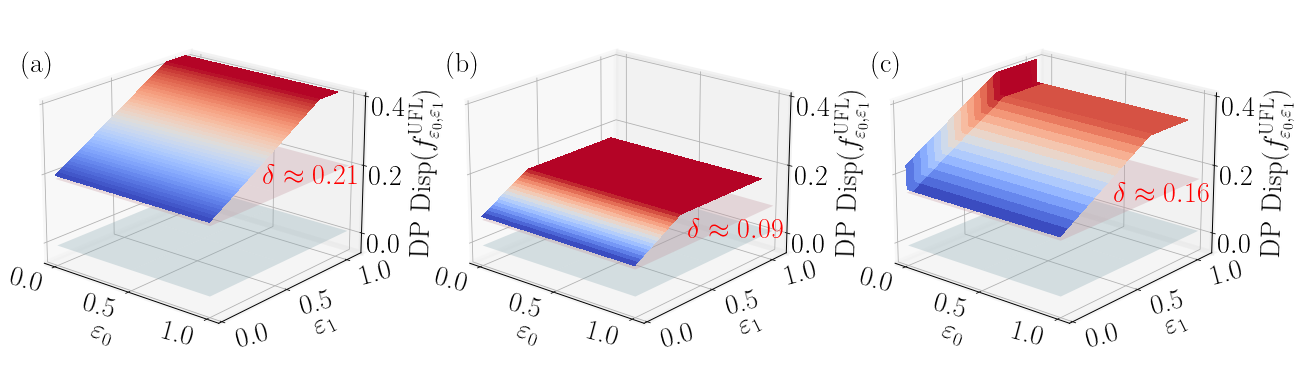

In [122]:
width = 18
height = width/4

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=5 #width of the boundary of legend
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(width, height) #exact size of the figure
fig.subplots_adjust(left=.02, bottom=.0, right=0.95, top=1.1) #margin of the figure

i = 0
        
# set up a figure twice as wide as it is tall

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(subplots[i][0], subplots[i][1], subplots[i][2], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
delta0 = subplots[i][2].reshape(-1).min()
ax.set_xlabel(r'$\varepsilon_0$')
ax.set_ylabel(r'$\varepsilon_1$')
ax.set_zlabel(r'DP Disp$(f_{\varepsilon_0, \varepsilon_1}^{\mathrm{UFL}})$')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticks(), rotation=-15, verticalalignment='center', horizontalalignment='right')
ax.xaxis.labelpad = 10
ax.set_yticks([0.0, 0.5, 1.0])
ax.set_yticklabels(ax.get_yticks(), rotation=15, verticalalignment='center', horizontalalignment='left')
ax.yaxis.labelpad = 10
# ax.set_zticklabels(ax.get_zticks(), verticalalignment='center', horizontalalignment='left')
ax.zaxis.labelpad = 15
ax.tick_params(axis="z",direction="in", pad=5)
ax.set_zticks([0.0, 0.2, 0.4])
ax.set_zlim(-0.05, 0.4)
ax.set_ylim(0, 1.1)
ax.view_init(20, -50)

hx, hy = np.meshgrid(np.arange(0,1.5,0.5), np.arange(0,1.65,0.55))
hz = np.zeros(9).reshape(3,3)
ax.plot_surface(hx, hy, hz, color="lightblue", alpha = 0.3)

hx, hy = np.meshgrid(np.arange(0,1.5,0.5), np.arange(0,1.65,0.55))
hz = np.ones(9).reshape(3,3)*(delta0-0.01)
ax.plot_surface(hx, hy, hz, color="pink", alpha = 0.3)

ax.text2D(0.68, 0.5, r"$\delta\approx 0.21$", transform=ax.transAxes, fontsize = 28, zorder = 100, color = 'red')
ax.set_title('(a)', fontsize = 28, loc = 'left', y = 0.8)


i = 1
        
# set up a figure twice as wide as it is tall
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(subplots[i][0], subplots[i][1], subplots[i][2], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
delta1 = subplots[i][2].reshape(-1).min()
ax.set_xlabel(r'$\varepsilon_0$')
ax.set_ylabel(r'$\varepsilon_1$')
ax.set_zlabel(r'DP Disp$(f_{\varepsilon_0, \varepsilon_1}^{\mathrm{UFL}})$')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticks(), rotation=-15, verticalalignment='center', horizontalalignment='right')
ax.xaxis.labelpad = 10
ax.set_yticks([0.0, 0.5, 1.0])
ax.set_yticklabels(ax.get_yticks(), rotation=15, verticalalignment='center', horizontalalignment='left')
ax.yaxis.labelpad = 10
# ax.set_zticklabels(ax.get_zticks(), verticalalignment='center', horizontalalignment='left')
ax.zaxis.labelpad = 15
ax.tick_params(axis="z",direction="in", pad=5)
ax.set_zticks([0.0, 0.2, 0.4])
ax.set_zlim(-0.05, 0.4)
ax.set_ylim(0, 1.1)
ax.view_init(20, -50)

hx, hy = np.meshgrid(np.arange(0,1.5,0.5), np.arange(0,1.65,0.55))
hz = np.ones(9).reshape(3,3)*(delta1-0.01)
ax.plot_surface(hx, hy, hz, color="pink", alpha = 0.3)

hx, hy = np.meshgrid(np.arange(0,1.5,0.5), np.arange(0,1.65,0.55))
hz = np.zeros(9).reshape(3,3)
ax.plot_surface(hx, hy, hz, color="lightblue", alpha = 0.3)
ax.text2D(0.68, 0.35, r"$\delta\approx 0.09$", transform=ax.transAxes, fontsize = 28, zorder = 100, color = 'red')

ax.set_title('(b)', fontsize = 28, loc = 'left', y = 0.8)


i = 2
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.plot_surface(subplots[i][0], subplots[i][1], subplots[i][2], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, rstride=10, cstride=10)
delta2 = subplots[i][2].reshape(-1).min()
ax.set_xlabel(r'$\varepsilon_0$')
ax.set_ylabel(r'$\varepsilon_1$')
ax.set_zlabel(r'DP Disp$(f_{\varepsilon_0, \varepsilon_1}^{\mathrm{UFL}})$')
ax.set_zlim(0, 0.4)
ax.set_zticks([0.2,0.4])
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticks(), rotation=-15, verticalalignment='center', horizontalalignment='right')
ax.xaxis.labelpad = 10
ax.set_yticks([0.0, 0.5, 1.0])
ax.set_yticklabels(ax.get_yticks(), rotation=15, verticalalignment='center', horizontalalignment='left')
ax.yaxis.labelpad = 10

ax.zaxis.labelpad = 15
ax.set_zticks([0.0, 0.2, 0.4])
ax.tick_params(axis="z",direction="in", pad=5)
ax.view_init(20, -50)
ax.set_zlim(-0.05, 0.4)
ax.set_ylim(0, 1.1)
ax.set_title('(c)', fontsize = 28, loc = 'left', y = 0.8)

hx, hy = np.meshgrid(np.arange(0,1.5,0.5), np.arange(0,1.65,0.55))
hz = np.zeros(9).reshape(3,3)
ax.plot_surface(hx, hy, hz, color="lightblue", alpha = 0.3)

hx, hy = np.meshgrid(np.arange(0,1.5,0.5), np.arange(0,1.65,0.55))
hz = np.ones(9).reshape(3,3)*(delta2-0.01)
ax.plot_surface(hx, hy, hz, color="pink", alpha = 0.3)
ax.text2D(0.68, 0.45, r"$\delta\approx 0.16$", transform=ax.transAxes, fontsize = 28, zorder = 100, color = 'red')

plt.savefig('figure1.pdf')
None

In [116]:
delta2

0.1646170491958792